# Final Project
### Topic: Using Principal Component Analysis to Evaluate Strength of 5 Ice Core Proxies in Reconstructing Earth Surface Temperature Over the Past 800,000 Years
#### 5 proxies: Deuterium, CO2, CH4, Dust, Calcium

#### Anna Chen (yc4406)

# 0. Background of study

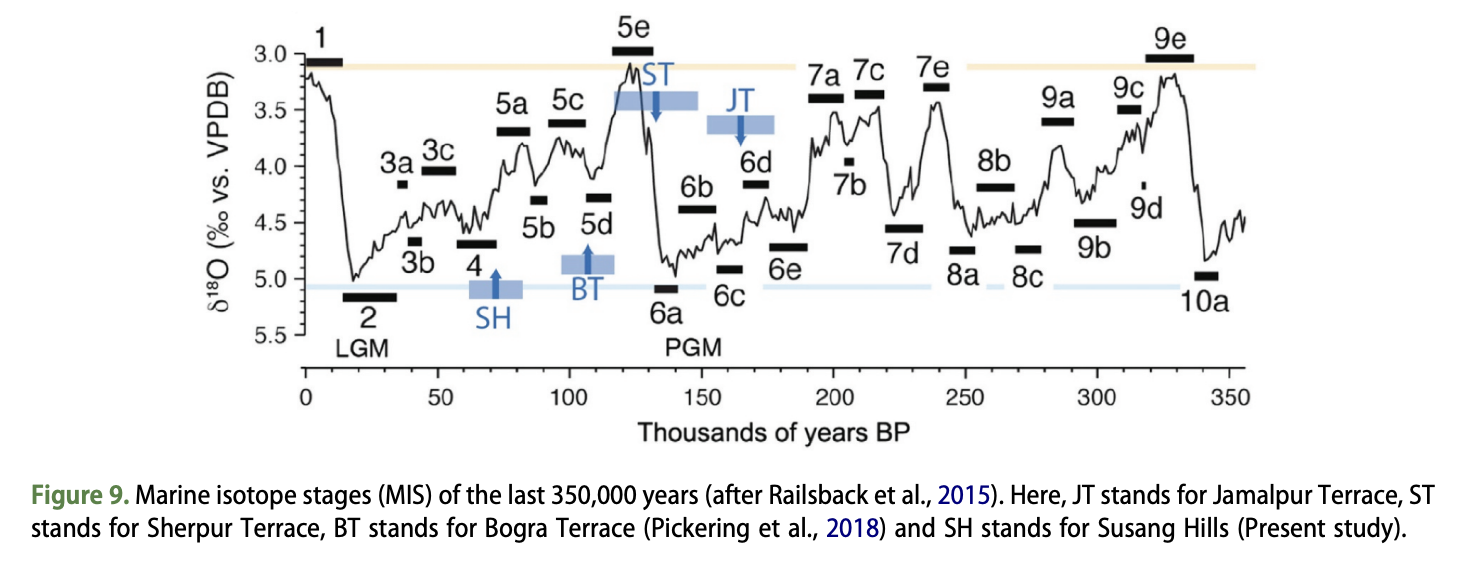

### Methodology visualized:

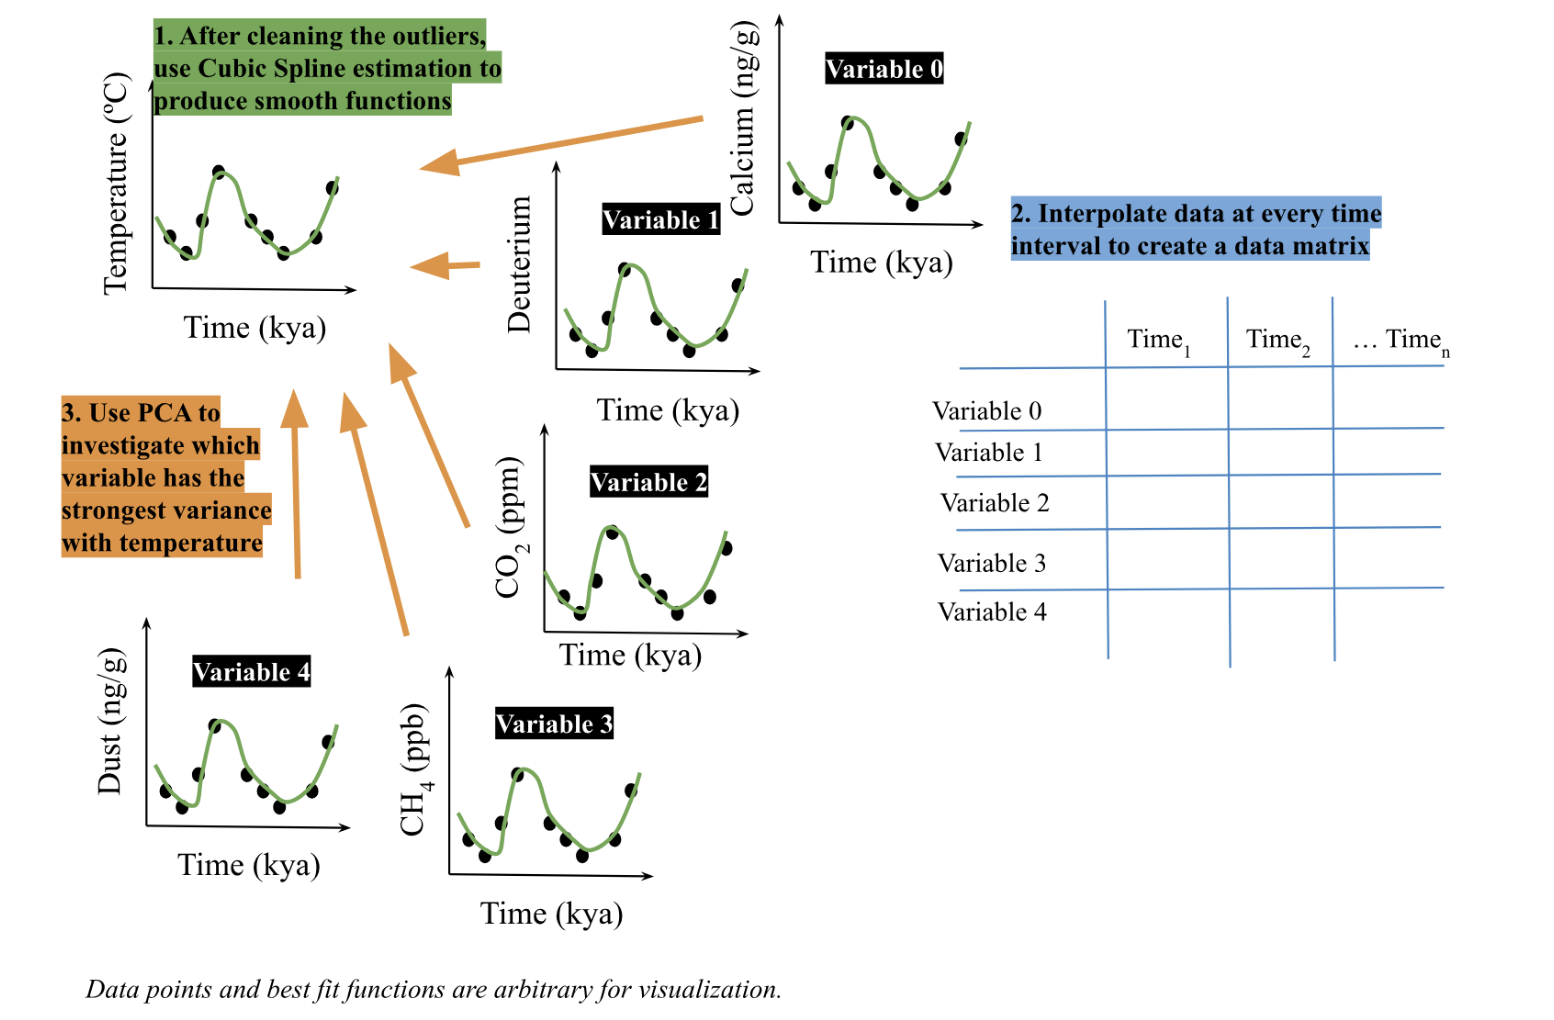

# 1. Load and plot proxies data

### All data are already z-score standardized
#### new = (old-mean)/sd

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.interpolate import CubicSpline
import math

## CO2
#### Original data in ppm

In [3]:
co2_csv = pd.read_csv('CO2_processed.csv')
print(co2_csv)

         time  mean_centered  standardized
0       0.137      49.564325      1.797527
1       0.268      44.064325      1.598061
2       0.279      47.064325      1.706861
3       0.395      48.264325      1.750381
4       0.404      51.064325      1.851927
...       ...            ...           ...
1090  794.608     -31.435675     -1.140064
1091  795.202     -35.635675     -1.292383
1092  796.467     -41.535675     -1.506356
1093  797.099     -42.435675     -1.538996
1094  798.512     -39.835675     -1.444703

[1095 rows x 3 columns]


In [4]:
# make an array for co2 data
co2_no_nan = co2_csv.dropna()
co2_s = co2_no_nan.to_numpy()

In [5]:
co2_age = co2_s[:,0] # gas age in thousand of years
co2_dobs = co2_s[:,2] # observed data
cs_co2 = CubicSpline(co2_age,co2_dobs) # cubic spline

In [7]:
# Least square (as comparison)
from scipy import optimize

P = 800000 #range of age

def func(age,A,B,C,D,E):
    dpre_sp = A*np.cos(D*2*np.pi*co2_age/P) + B*np.sin(E*2*np.pi*co2_age/P) + C
    return dpre_sp

mest = optimize.curve_fit(func, xdata = co2_age,
                             ydata = co2_dobs)[0]
mest

A = mest[0]
B = mest[1]
C = mest[2]
D = mest[3]
E = mest[4]

dpre_sp = A*np.cos(D*2*np.pi*co2_age/P) + B*np.sin(E*2*np.pi*co2_age/P) + C

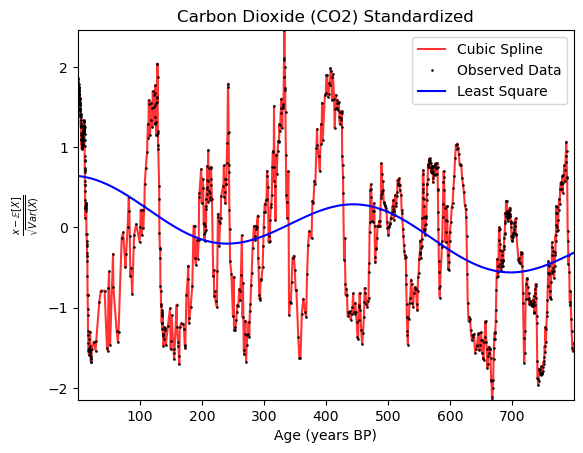

In [8]:
fig,ax = plt.subplots()
plt.axis([np.min(co2_age), np.max(co2_age), np.min(co2_dobs), np.max(co2_dobs)])
plt.plot(co2_age,cs_co2(co2_age),'r-', alpha=0.8, label = 'Cubic Spline')
plt.plot(co2_age,co2_dobs,'ko', markersize=1, alpha=0.8, label = 'Observed Data')
plt.plot(co2_age,dpre_sp,'b-', label = 'Least Square')
plt.xlabel('Age (years BP)')
plt.ylabel(r"$\frac{x-\mathbb{E}[X]}{\sqrt{Var(X)}}$")
plt.title('Carbon Dioxide (CO2) Standardized')
plt.legend()

## CH4
#### Original data in ppb

In [9]:
ch4_csv = pd.read_csv('CH4_processed.csv')
print(ch4_csv)

         time  mean_centered  standardized
0       0.013     387.029957      4.395695
1       0.126     264.029957      2.998722
2       0.130     242.029957      2.748857
3       0.151     190.029957      2.158267
4       0.184     207.029957      2.351344
...       ...            ...           ...
2098  794.938     -91.970043     -1.044550
2099  796.320    -101.970043     -1.158125
2100  797.277    -123.970043     -1.407991
2101  798.417     -61.970043     -0.703825
2102  799.396    -120.970043     -1.373918

[2103 rows x 3 columns]


In [10]:
# make an array for ch4 data
ch4_no_nan = ch4_csv.dropna()
ch4_s = ch4_no_nan.to_numpy()

In [11]:
ch4_age = ch4_s[:,0] # gas age in k years
ch4_dobs = ch4_s[:,2] # data observed
cs_ch4 = CubicSpline(ch4_age,ch4_dobs) # cubic spline

In [12]:
# Least square for CH4 (as comparison)

P = 800000 # range of age is 800k

def func(age,A,B,C,D,E):
    dpre_sp = A*np.cos(D*2*np.pi*age/P) + B*np.sin(E*2*np.pi*age/P) + C
    return dpre_sp

mest = optimize.curve_fit(func, xdata = ch4_age,
                             ydata = ch4_dobs, nan_policy='omit')[0]
mest

A = mest[0]
B = mest[1]
C = mest[2]
D = mest[3]
E = mest[4]

dpre_sp = A*np.cos(D*2*np.pi*ch4_age/P) + B*np.sin(E*2*np.pi*ch4_age/P) + C

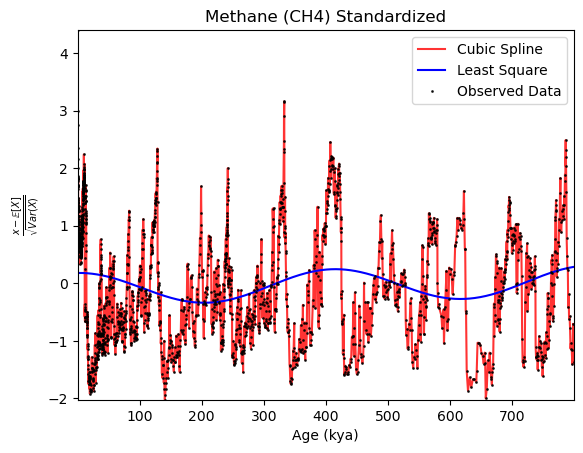

In [13]:
fig,ax = plt.subplots()
plt.axis([np.min(ch4_age), np.max(ch4_age), np.min(ch4_dobs), np.max(ch4_dobs)])
plt.plot(ch4_age,cs_ch4(ch4_age),'r-', alpha=0.8, label = 'Cubic Spline')
plt.plot(ch4_age,dpre_sp,'b-', label = 'Least Square')
plt.plot(ch4_age,ch4_dobs,'ko', markersize=1, alpha=0.8, label = 'Observed Data')
plt.xlabel('Age (kya)')
plt.ylabel(r"$\frac{x-\mathbb{E}[X]}{\sqrt{Var(X)}}$")
plt.title('Methane (CH4) Standardized')
plt.legend()

## Deuterium
#### Original data in ‰SMOW (standard mean ocean water)

In [14]:
deuterium_csv = pd.read_csv('deuterium_temp_processed.csv')
print(deuterium_csv)

         time  mean_centered  standardized
0       0.038      26.896266      1.494221
1       0.047      32.696266      1.816440
2       0.055      39.996266      2.221991
3       0.064      23.696266      1.316445
4       0.073      19.096266      1.060892
...       ...            ...           ...
5783  797.408     -22.403734     -1.244639
5784  798.443     -21.203734     -1.177973
5785  799.501     -23.303734     -1.294638
5786  800.589     -23.603734     -1.311304
5787  801.662     -23.103734     -1.283527

[5788 rows x 3 columns]


In [15]:
deuterium_no_nan = deuterium_csv.dropna()
deuterium_s = deuterium_no_nan.to_numpy()
print(deuterium_s)

[[ 3.80000000e-02  2.68962662e+01  1.49422095e+00]
 [ 4.70000000e-02  3.26962662e+01  1.81643971e+00]
 [ 5.50000000e-02  3.99962662e+01  2.22199091e+00]
 ...
 [ 7.99501000e+02 -2.33037338e+01 -1.29463796e+00]
 [ 8.00589000e+02 -2.36037338e+01 -1.31130445e+00]
 [ 8.01662000e+02 -2.31037338e+01 -1.28352697e+00]]


In [16]:
deu_age = deuterium_s[:,0]
deu_dobs = deuterium_s[:,2]
cs_deuterium = CubicSpline(deu_age,deu_dobs)

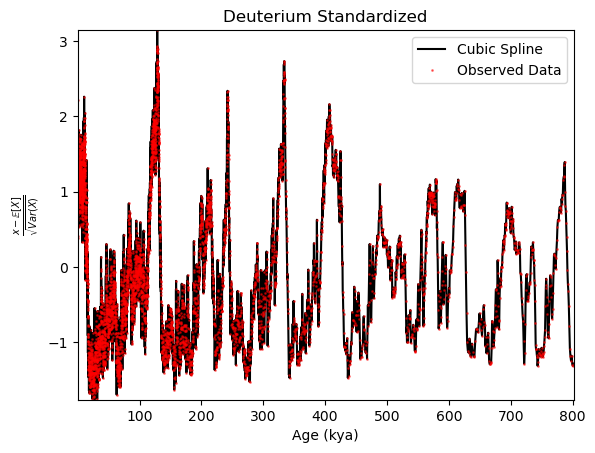

In [17]:
fig,ax = plt.subplots()
plt.axis([np.min(deu_age), np.max(deu_age), np.min(deu_dobs), np.max(deu_dobs)])
plt.plot(deu_age,cs_deuterium(deu_age),'k-', label = 'Cubic Spline')
plt.plot(deu_age,deu_dobs,'ro', markersize=1, alpha=0.5, label = 'Observed Data')
plt.xlabel('Age (kya)')
plt.ylabel(r"$\frac{x-\mathbb{E}[X]}{\sqrt{Var(X)}}$")
plt.title('Deuterium Standardized')
plt.legend()

## Oxygen
#### dO18-to-dO16 ratio, units are ‰

In [18]:
oxygen_csv = pd.read_csv('d18O_processed.csv')
print(oxygen_csv)

          time  mean_centered  standardized
0     101.7452      -0.415114     -1.083255
1     102.0217      -0.527914     -1.377611
2     102.2834      -0.402614     -1.050636
3     102.5235      -0.419814     -1.095520
4     102.7362      -0.511014     -1.333510
...        ...            ...           ...
1368  797.5666       0.244486      0.637996
1369  799.3826       0.181986      0.474900
1370  801.0465       0.081986      0.213946
1371  804.4784      -0.200514     -0.523248
1372  805.8112      -0.131814     -0.343973

[1373 rows x 3 columns]


In [19]:
oxygen_no_nan = oxygen_csv.dropna()
oxygen_s = oxygen_no_nan.to_numpy()

o2_age = oxygen_s[:,0]
o2_dobs = oxygen_s[:,2]
cs_o2 = CubicSpline(o2_age,o2_dobs)

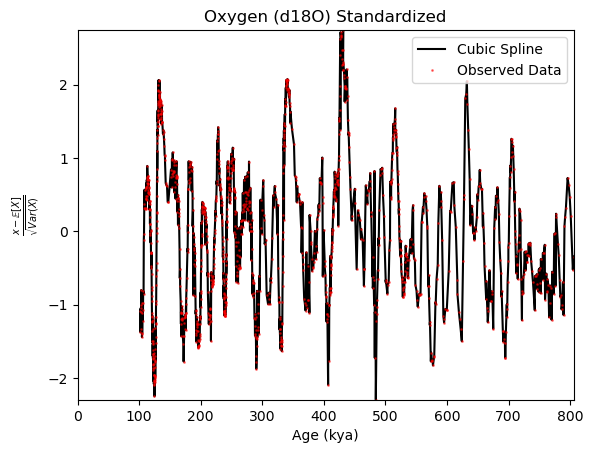

In [20]:
fig,ax = plt.subplots()
plt.axis([np.min(0), np.max(o2_age), np.min(o2_dobs), np.max(o2_dobs)])
plt.plot(o2_age,cs_o2(o2_age),'k-', label = 'Cubic Spline')
plt.plot(o2_age,o2_dobs,'ro', markersize=1, alpha=0.5, label = 'Observed Data')
plt.xlabel('Age (kya)')
plt.ylabel(r"$\frac{x-\mathbb{E}[X]}{\sqrt{Var(X)}}$")
plt.title('Oxygen (d18O) Standardized')
plt.legend()

## Dust (with outliers)
#### Original data in ng/g

In [21]:
dustmass_csv = pd.read_csv('dustmass_processed.csv')
print(dustmass_csv)

          time  mean_centered  standardized
0     0.000371    -147.094069     -0.648462
1     0.000383    -112.394069     -0.495488
2     0.000395            NaN           NaN
3     0.000407            NaN           NaN
4     0.000419            NaN           NaN
...        ...            ...           ...
5750  0.796449     353.413703      1.558020
5751  0.797408     465.133231      2.050534
5752  0.798443     631.764251      2.785125
5753  0.799501     888.807931      3.918298
5754  0.800589     494.199081      2.178670

[5755 rows x 3 columns]


In [22]:
dustmass_no_nan = dustmass_csv.dropna()
dustmass_s = dustmass_no_nan.to_numpy()
#time column is 1000x off
dustmass_s[:,0] = dustmass_s[:,0]*1000
#dustmass is negatively correlated with temperature, eg. low dust during interglacial

dustmass_age = dustmass_s[:,0]
dustmass_dobs = dustmass_s[:,2]
cs_dustmass = CubicSpline(dustmass_age,dustmass_dobs)

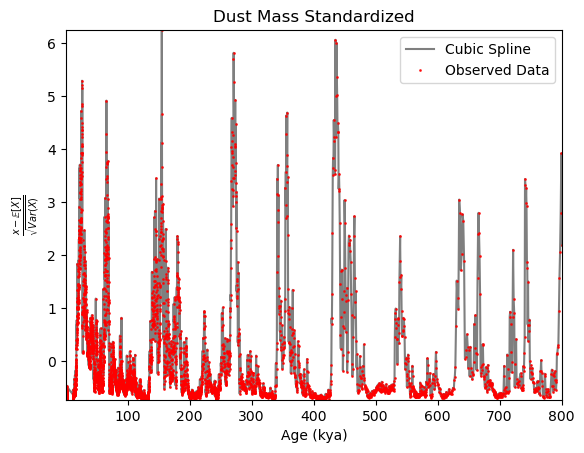

In [23]:
fig,ax = plt.subplots()
plt.axis([np.min(dustmass_age), np.max(dustmass_age), np.min(dustmass_dobs), np.max(dustmass_dobs)])
plt.plot(dustmass_age,cs_dustmass(dustmass_age),'k-', alpha=0.5, label = 'Cubic Spline')
plt.plot(dustmass_age,dustmass_dobs,'ro', markersize=1, alpha=0.8, label = 'Observed Data')
plt.xlabel('Age (kya)')
plt.ylabel(r"$\frac{x-\mathbb{E}[X]}{\sqrt{Var(X)}}$")
plt.title('Dust Mass Standardized')
plt.legend()

## Ca2+ (with outliers)
#### Original data in ng/g

In [24]:
ca_csv = pd.read_csv('Ca_processed.csv')
print(ca_csv)

              time  mean_centered  standardized
0         0.042976      -8.655727     -0.594254
1         0.043130      -8.014727     -0.550247
2         0.043283      -7.898727     -0.542283
3         0.043437      -7.898727     -0.542283
4         0.043590      -7.290727     -0.500541
...            ...            ...           ...
297263  801.486418      36.803273      2.526709
297264  801.505927      32.803273      2.252091
297265  801.525436      24.173273      1.659603
297266  801.544945      27.701273      1.901816
297267  801.564455      34.109273      2.341754

[297268 rows x 3 columns]


In [25]:
ca_no_nan = ca_csv.dropna()
ca_s = ca_no_nan.to_numpy()

In [33]:
ca_age = ca_s[:,0]
ca_dobs = ca_s[:,2]
cs_ca = CubicSpline(ca_age,ca_dobs)

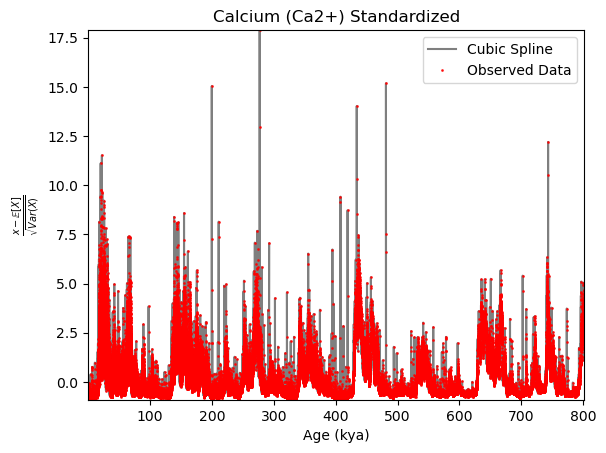

In [27]:
fig,ax = plt.subplots()
plt.axis([np.min(ca_age), np.max(ca_age), np.min(ca_dobs), np.max(ca_dobs)])
plt.plot(ca_age,cs_ca(ca_age),'k-', alpha=0.5, label = 'Cubic Spline')
plt.plot(ca_age,ca_dobs,'ro', markersize=1, alpha=0.8, label = 'Observed Data')
plt.xlabel('Age (kya)')
plt.ylabel(r"$\frac{x-\mathbb{E}[X]}{\sqrt{Var(X)}}$")
plt.title('Calcium (Ca2+) Standardized')
plt.legend()

# 2. Clean Outliers
#### (I had a friend from LA class who helped me with this)

In [28]:
# partition of glacial vs. interglacial
# Source:
# Lisiecki, L. E., & Raymo, M. E. (2005). A Pliocene-Pleistocene stack of 57
# globally distributed benthic δ18O records. Paleoceanography, 20(1), PA1003.
# https://doi.org/10.1029/2004PA001071

# | **MIS** | **Period (kya)**         | **Type**        |
# |---------|--------------------------|-----------------|
# | MIS 1   | 0 - 11.7                 | Interglacial    |
# | MIS 2   | 18 - 24                  | Glacial         |
# | MIS 3   | 24 - 57                  | Interglacial    |
# | MIS 4   | 57 - 71                  | Glacial         |
# | MIS 5   | 71 - 130                 | Interglacial    |
# | MIS 6   | 130 - 191                | Glacial         |
# | MIS 7   | 191 - 245                | Interglacial    |
# | MIS 8   | 245 - 300                | Glacial         |
# | MIS 9   | 300 - 335                | Interglacial    |
# | MIS 10  | 335 - 380                | Glacial         |
# | MIS 11  | 380 - 425                | Interglacial    |
# | MIS 12  | 425 - 480                | Glacial         |
# | MIS 13  | 480 - 533                | Interglacial    |
# | MIS 14  | 533 - 580                | Glacial         |
# | MIS 15  | 580 - 630                | Interglacial    |
# | MIS 16  | 630 - 670                | Glacial         |
# | MIS 17  | 670 - 700                | Interglacial    |
# | MIS 18  | 700 - 740                | Glacial         |
# | MIS 19  | 740 - 780                | Interglacial    |
# | MIS 20  | 780 - 800                | Glacial         |

In [29]:
#Methods

def remove_outliers_iqr(data, column,k):
    """Removes outliers based on IQR

        takes in data (np.ndarray),
        column (np.ndarray) to remove outliers from
        k (int) that specifies k*IQR threshold
        returns new data (np.ndarray) with outliers removed

    """
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    iqr = q3 - q1

    lower_bound = q1 - k * iqr
    upper_bound = q3 + k * iqr

    # Mask the data to exclude outliers
    mask = (column >= lower_bound) & (column <= upper_bound)

    # Return only the rows where the column values are within bounds
    return data[mask]

def plot_graph(dobs,age,cs_data,title):
    ''' Plots Cubic Spline graph

    takes in data columns (dobs, age, cs_data) and String title
    plots a Cubic Spline graph
    returns None

    '''

    fig,ax = plt.subplots()
    plt.axis([np.min(age), np.max(age), np.min(dobs), np.max(dobs)])
    plt.plot(age,cs_data(age),'k-', alpha=0.5, label = 'Cubic Spline')
    plt.plot(age,dobs,'ro', markersize=1, alpha=0.8, label = 'Observed Data')
    plt.xlabel('Age (kya)')
    plt.ylabel(r"$\frac{x-\mathbb{E}[X]}{\sqrt{Var(X)}}$")
    plt.title(title)
    plt.legend()
    return None

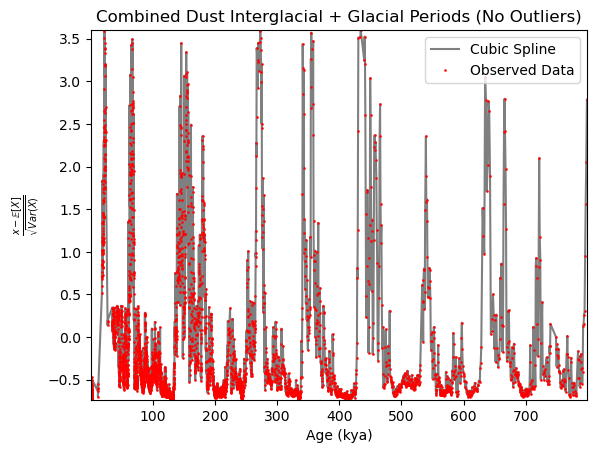

In [30]:
# Dust

# Define the intervals for interglacial and glacial periods (kya)
interglacial_periods = [
    (0, 11.7), (24, 57), (71, 130), (191, 245), (300, 335), (380, 425),
    (480, 533), (580, 630), (670, 700), (740, 780)  # MIS 1, 3, 5, 7, 9, 11, 13, 15, 17, 19
]

glacial_periods = [
    (18, 24), (57, 71), (130, 191), (245, 300), (335, 380), (425, 480),
    (533, 580), (630, 670), (700, 740), (780, 800)  # MIS 2, 4, 6, 8, 10, 12, 14, 16, 18, 20
]

# Splicing interglacial data
interglacial_data = []
for start, end in interglacial_periods:
    mask = (dustmass_age >= start) & (dustmass_age <= end)
    interglacial_data.append(dustmass_s[mask])

# Concatenate interglacial data
interglacial_s = np.vstack(interglacial_data)

# Splicing glacial data
glacial_data = []
for start, end in glacial_periods:
    mask = (dustmass_age >= start) & (dustmass_age <= end)
    glacial_data.append(dustmass_s[mask])

# Concatenate glacial data
glacial_s = np.vstack(glacial_data)

# Remove outliers for interglacial & glacial data
interglacial_s_no_outliers = remove_outliers_iqr(interglacial_s, interglacial_s[:, 2],1.5)  # Standardized column (ca_dobs)
glacial_s_no_outliers = remove_outliers_iqr(glacial_s, glacial_s[:, 2],1.5)  # Standardized column (ca_dobs)

# Concatenate new interglacial & glacial data
dustmass_s_no_outliers = np.vstack([interglacial_s_no_outliers, glacial_s_no_outliers])

# define columns
dustmass_combined_age = dustmass_s_no_outliers[:, 0]
dustmass_combined_dobs = dustmass_s_no_outliers[:, 2]

# sort data (or else plotting method won't process)
dustmass_sorted_indices = np.argsort(dustmass_combined_age)
dustmass_combined_age_sorted = dustmass_combined_age[dustmass_sorted_indices]
dustmass_combined_dobs_sorted = dustmass_combined_dobs[dustmass_sorted_indices]

# remove duplicates if necessary
unique_ages, indices = np.unique(dustmass_combined_age_sorted, return_index=True)
dustmass_combined_age_sorted = dustmass_combined_age_sorted[indices]
dustmass_combined_dobs_sorted = dustmass_combined_dobs_sorted[indices]

# create a new cubic spline for the sorted data
dustmass_cs_combined = CubicSpline(dustmass_combined_age_sorted, dustmass_combined_dobs_sorted)

# override old variable names with new variable names
dust_age = dustmass_combined_age_sorted
dust_dobs = dustmass_combined_dobs_sorted
cs_dust = dustmass_cs_combined

# Plot the data
plot_graph(dust_dobs, dust_age, cs_dust, 'Combined Dust Interglacial + Glacial Periods (No Outliers)')

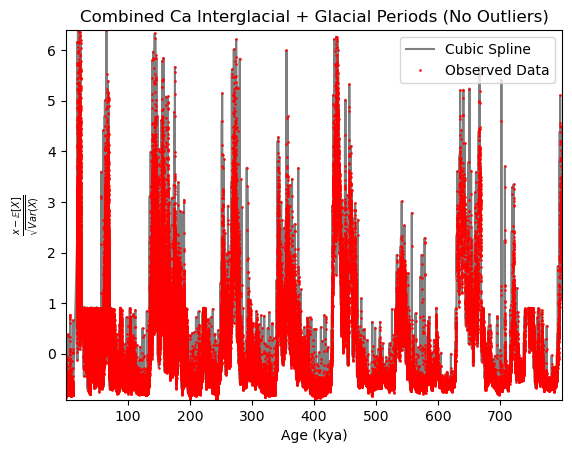

In [34]:
# Calcium: clean outliers

# Define intervals for interglacial & glacial periods (kya)
interglacial_periods = [
    (0, 11.7), (24, 57), (71, 130), (191, 245), (300, 335), (380, 425),
    (480, 533), (580, 630), (670, 700), (740, 780)  # MIS 1, 3, 5, 7, 9, 11, 13, 15, 17, 19
]

glacial_periods = [
    (18, 24), (57, 71), (130, 191), (245, 300), (335, 380), (425, 480),
    (533, 580), (630, 670), (700, 740), (780, 800)  # MIS 2, 4, 6, 8, 10, 12, 14, 16, 18, 20
]

# splice interglacial data
interglacial_data = []
for start, end in interglacial_periods:
    mask = (ca_age >= start) & (ca_age <= end)
    interglacial_data.append(ca_s[mask])

# Concatenate interglacial data
interglacial_s = np.vstack(interglacial_data)

# splice glacial data
glacial_data = []
for start, end in glacial_periods:
    mask = (ca_age >= start) & (ca_age <= end)
    glacial_data.append(ca_s[mask])

# Concatenate glacial data
glacial_s = np.vstack(glacial_data)

# Remove outliers for both
interglacial_s_no_outliers = remove_outliers_iqr(interglacial_s, interglacial_s[:, 2],3)  # Standardized column (ca_dobs)
glacial_s_no_outliers = remove_outliers_iqr(glacial_s, glacial_s[:, 2],3)  # Standardized column (ca_dobs)

# Concatenate interglacial and glacial data
ca_s_no_outliers = np.vstack([interglacial_s_no_outliers, glacial_s_no_outliers])

# name columns
ca_combined_age = ca_s_no_outliers[:, 0]
ca_combined_dobs = ca_s_no_outliers[:, 2]

# Sort data by (increasing) age
ca_sorted_indices = np.argsort(ca_combined_age)
ca_combined_age_sorted = ca_combined_age[ca_sorted_indices]
ca_combined_dobs_sorted = ca_combined_dobs[ca_sorted_indices]

# Create a new cubic spline for sorted data
ca_cs_combined = CubicSpline(ca_combined_age_sorted, ca_combined_dobs_sorted)

# override old variable names with new variable names
ca_age = ca_combined_age_sorted
ca_dobs = ca_combined_dobs_sorted
cs_cs = ca_cs_combined

# Plot
plot_graph(ca_dobs, ca_age, cs_cs, 'Combined Ca Interglacial + Glacial Periods (No Outliers)')

## Plot combined graph with cleaned datasets

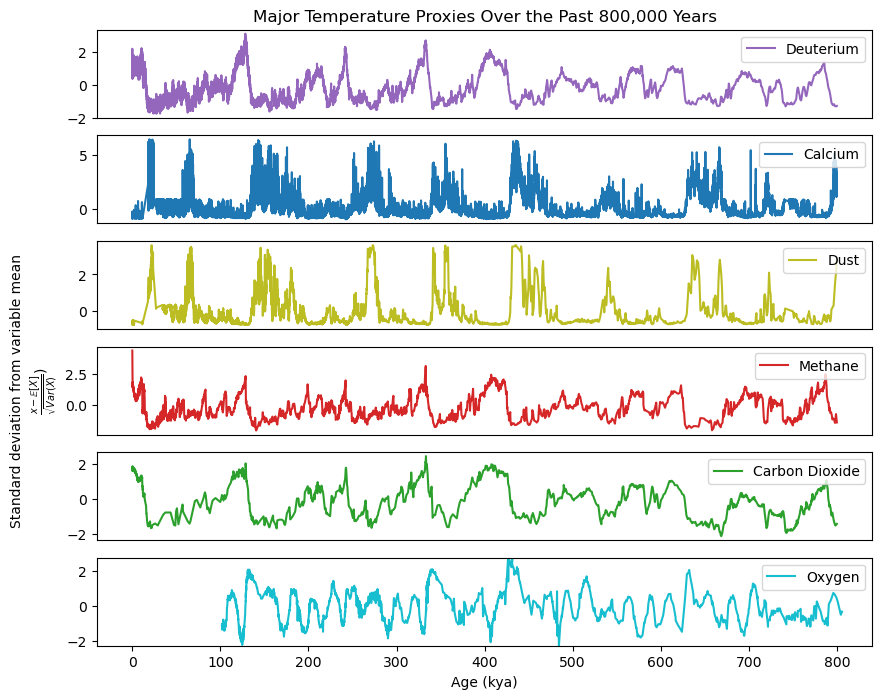

In [35]:
fig,ax = plt.subplots(nrows=6, ncols=1, figsize=(10,8))

ax[0].plot(deu_age,cs_deuterium(deu_age),'tab:purple', label = 'Deuterium')
ax[0].set_xticks([])

ax[1].plot(ca_combined_age_sorted, ca_cs_combined(ca_combined_age_sorted),'tab:blue', label = 'Calcium')
ax[1].set_xticks([])

ax[2].plot(dustmass_combined_age_sorted, dustmass_cs_combined(dustmass_combined_age_sorted),'tab:olive', label = 'Dust')
ax[2].set_xticks([])

ax[3].plot(ch4_age,cs_ch4(ch4_age),'tab:red', label = 'Methane')
ax[3].set_xticks([])

ax[4].plot(co2_age,cs_co2(co2_age),'tab:green',  label = 'Carbon Dioxide')
ax[4].set_xticks([])

ax[5].plot(o2_age,cs_o2(o2_age),'tab:cyan', label = 'Oxygen')
ax[5].axis([-40, 840,np.min(cs_o2(o2_age)),np.max(cs_o2(o2_age))])
ax[5].set_xlabel('Age (kya)')

ax[3].set_ylabel("Standard deviation from variable mean" + "\n"  + r"$\frac{x-\mathbb{E}[X]}{\sqrt{Var(X)}}$)")
ax[0].set_title('Major Temperature Proxies Over the Past 800,000 Years')

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
ax[5].legend(loc = 'upper right')

# 3. Interpolation at set time intervals (with cleaned data)
#### Not including oxygen data because it doesn't start until 100kya

In [85]:
# time interval = 1 kya ("thousands of years ago")
time_1 = np.arange(1,801,1)

In [86]:
# estimate the data at each time stamp (when time interval = 1)
deu_1 = cs_deuterium(time_1)
dust_1 = dustmass_cs_combined(time_1)
ch4_1 = cs_ch4(time_1)
co2_1 = cs_co2(time_1)
ca_1 = ca_cs_combined(time_1)

In [87]:
# construct data matrix
data_1 = np.matrix([deu_1, co2_1, ch4_1, dust_1, ca_1])
NN = np.shape(data_1)
m = NN[0] # number of variables
n = NN[1] # number of time stamps, or enteries per variable/row

print("The original data matrix, X, is", data_1)
print("The number of variables/rows is", m)
print("When the time interval is 1 kya, the number of enteries per row is", n)
print("Matrix X has", m, "x", n, "enteries")

The original data matrix, X, is [[ 1.06693031  0.8442173   1.22755715 ... -1.20084731 -1.22827562
  -1.32150188]
 [ 1.69616191  1.66449499  1.65976841 ... -1.49814139 -1.3831313
  -1.25580044]
 [ 1.2508659   0.89760463  0.68776422 ... -0.96746742 -0.78016072
  -3.55848859]
 [-0.70282657 -0.64879989  3.73667359 ...  2.41601076  3.42837682
   5.30521079]
 [-0.7278805  -0.68451837 -0.74624729 ...  2.51234847  3.81003391
   2.93060021]]
The number of variables/rows is 5
When the time interval is 1 kya, the number of enteries per row is 800
Matrix X has 5 x 800 enteries


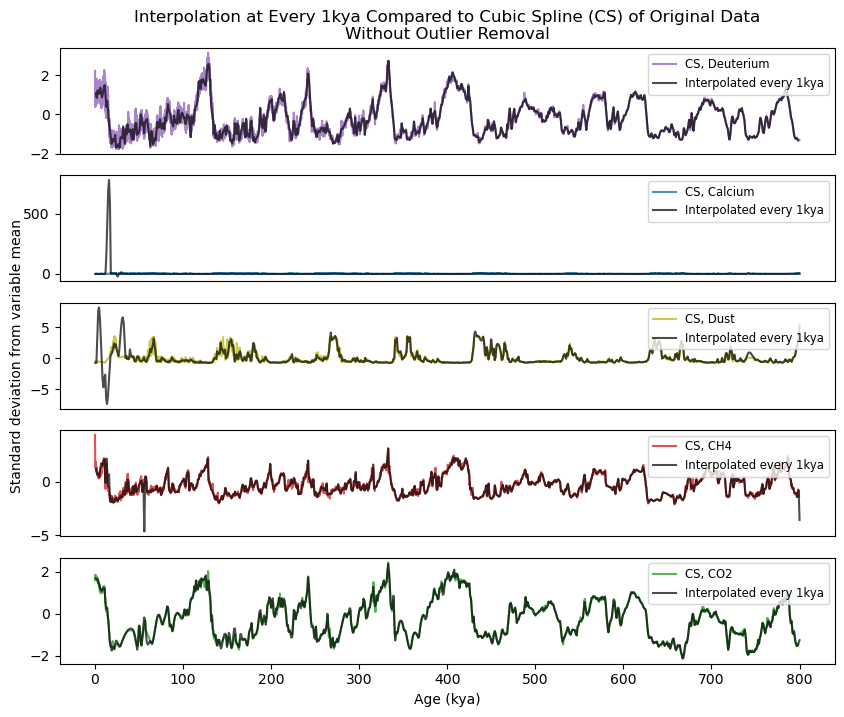

In [88]:
# plot each interpolation versus the original cubic spline
fig,ax = plt.subplots(nrows=5,ncols=1,figsize=(10,8))

ax[0].plot(deu_age, cs_deuterium(deu_age), 'tab:purple', alpha=0.8, label='CS, Deuterium')
ax[0].plot(time_1, deu_1, 'k-', alpha=0.7, label='Interpolated every 1kya')
ax[0].set_xticks([])
ax[0].set_title('Interpolation at Every 1kya Compared to Cubic Spline (CS) of Original Data' + '\n' + 'Without Outlier Removal')

ax[1].plot(ca_age, cs_ca(ca_age), 'tab:blue', alpha=0.8, label='CS, Calcium')
ax[1].plot(time_1, ca_1, 'k-', alpha=0.7, label='Interpolated every 1kya')
ax[1].set_xticks([])

ax[2].plot(dust_age, cs_dust(dust_age), 'tab:olive', alpha=0.8, label='CS, Dust')
ax[2].plot(time_1, dust_1, 'k-', alpha=0.7, label='Interpolated every 1kya')
ax[2].set_xticks([])
ax[2].set_ylabel("Standard deviation from variable mean")

ax[3].plot(ch4_age, cs_ch4(ch4_age), 'tab:red', alpha=0.8, label='CS, CH4')
ax[3].plot(time_1, ch4_1, 'k-', alpha=0.7, label='Interpolated every 1kya')
ax[3].set_xticks([])

ax[4].plot(co2_age, cs_co2(co2_age), 'tab:green', alpha=0.8, label='CS, CO2')
ax[4].plot(time_1, co2_1, 'k-', alpha=0.7, label='Interpolated every 1kya')
ax[4].set_xlabel('Age (kya)')

ax[0].legend(fontsize='small')
ax[1].legend(fontsize='small')
ax[2].legend(fontsize='small')
ax[3].legend(fontsize='small')
ax[4].legend(fontsize='small')

In [89]:
# because ca, dust, and ch4 doesn't interpolate properly, 
# we manually remove outliers and replace using 0

ca_1[ca_1 > 10] = 0
ca_1[ca_1 < -10] = 0
dust_1[dust_1 > 5] = 0
dust_1[dust_1 < (-2)] = 0
ch4_1[ch4_1 < (-3)] = 0

In [90]:
# re-construct data matrix and override original variable
data = np.matrix([deu_1, co2_1, ch4_1, dust_1, ca_1])

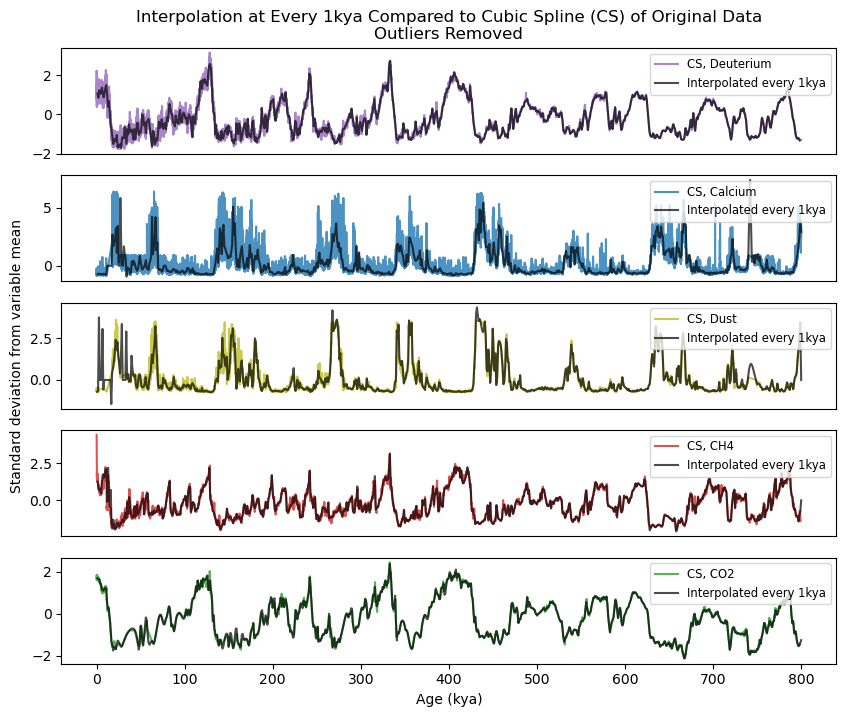

In [76]:
# re-plot each interpolation versus the original cubic spline
fig,ax = plt.subplots(nrows=5,ncols=1,figsize=(10,8))

ax[0].plot(deu_age, cs_deuterium(deu_age), 'tab:purple', alpha=0.8, label='CS, Deuterium')
ax[0].plot(time_1, deu_1, 'k-', alpha=0.7, label='Interpolated every 1kya')
ax[0].set_xticks([])
ax[0].set_title('Interpolation at Every 1kya Compared to Cubic Spline (CS) of Original Data' + '\n' + 'Outliers Removed')

ax[1].plot(ca_age, cs_ca(ca_age), 'tab:blue', alpha=0.8, label='CS, Calcium')
ax[1].plot(time_1, ca_1, 'k-', alpha=0.7, label='Interpolated every 1kya')
ax[1].set_xticks([])

ax[2].plot(dust_age, cs_dust(dust_age), 'tab:olive', alpha=0.8, label='CS, Dust')
ax[2].plot(time_1, dust_1, 'k-', alpha=0.7, label='Interpolated every 1kya')
ax[2].set_xticks([])
ax[2].set_ylabel("Standard deviation from variable mean")

ax[3].plot(ch4_age, cs_ch4(ch4_age), 'tab:red', alpha=0.8, label='CS, CH4')
ax[3].plot(time_1, ch4_1, 'k-', alpha=0.7, label='Interpolated every 1kya')
ax[3].set_xticks([])

ax[4].plot(co2_age, cs_co2(co2_age), 'tab:green', alpha=0.8, label='CS, CO2')
ax[4].plot(time_1, co2_1, 'k-', alpha=0.7, label='Interpolated every 1kya')
ax[4].set_xlabel('Age (kya)')

ax[0].legend(fontsize='small')
ax[1].legend(fontsize='small')
ax[2].legend(fontsize='small')
ax[3].legend(fontsize='small')
ax[4].legend(fontsize='small')

# 4. Conduct Principle Component Analysis (PCA)

## Find the covariance matrix

In [77]:
data = data

m,n = data.shape

S = np.cov(data)
print('The original data matrix, X, is', '\n', data,'\n')

#print covariance matrix, S
print('The covariance matrix, S, is \n',S,'\n')

#print correlation matrix
print('The correlation matrix is \n', np.corrcoef(data), '\n')

#print eigenvalues of S
eigvals = np.linalg.eigvals(S)
print('The eigenvalues of the covariance matrix are \n', eigvals,'\n')

# creates a matrix of the recentered data, dividing by 1/sqrt(n-1)
recentered_data = 1/math.sqrt(n-1)*(data-data.mean(axis=1).reshape(-1, 1))

print('The recentered data matrix, B, is \n', recentered_data, '\n')

# we use singular value decomposition to diagonalize the covariance matrix
u,s,Pt = np.linalg.svd(np.transpose(recentered_data))
print('Through Singular Value Decomposition, we find the matrix P^t is \n', Pt,'\n')

# Because we've already standardized the data, we don't need to recenter it again
#u,s,Pt = np.linalg.svd(np.transpose(data))

P = np.transpose(Pt)

# getting the transformed data
transformed_data = Pt @ data
print('The transformed data, y = P^Tx, is \n', transformed_data, '\n')

# getting the covariance matrix of the transformed data
D = np.matrix.round(np.diag(eigvals), decimals=2)
print('The covariance matrix, D, of the transformed data is the diagonal matrix of the eigenvalues, which is \n', D, '\n')

# get the total variance of the transformed data
print('The total variance is \n', np.sum(eigvals), '\n')

# calculate the % of total variance 
var_list = [ eigvals[0], eigvals[1], eigvals[2], eigvals[3], eigvals[4] ]/np.sum(eigvals)*100
print('The percentage of total variance covered by deuterium, CO2, CH4, dust, and calcium, respectively, are \n', var_list)


The original data matrix, X, is 
 [[ 1.06693031  0.8442173   1.22755715 ... -1.20084731 -1.22827562
  -1.32150188]
 [ 1.69616191  1.66449499  1.65976841 ... -1.49814139 -1.3831313
  -1.25580044]
 [ 1.2508659   0.89760463  0.68776422 ... -0.96746742 -0.78016072
   0.        ]
 [-0.70282657 -0.64879989  3.73667359 ...  2.41601076  3.42837682
   0.        ]
 [-0.7278805  -0.68451837 -0.74624729 ...  2.51234847  3.81003391
   2.93060021]] 

The covariance matrix, S, is 
 [[ 0.71293059  0.67235203  0.64650589 -0.52023163 -0.64923487]
 [ 0.67235203  0.86212954  0.67405502 -0.53975301 -0.71207833]
 [ 0.64650589  0.67405502  0.87556373 -0.50948679 -0.65569156]
 [-0.52023163 -0.53975301 -0.50948679  1.03442236  0.93627195]
 [-0.64923487 -0.71207833 -0.65569156  0.93627195  1.3133782 ]] 

The correlation matrix is 
 [[ 1.          0.85760407  0.81828573 -0.6057929  -0.67093942]
 [ 0.85760407  1.          0.77582756 -0.57155741 -0.66918562]
 [ 0.81828573  0.77582756  1.         -0.53535282 -0.611

## Dimension reduction and data approximation

In [78]:
# truncating by keeping first k components
k = 2

#truncated P matrix that keeps the first k columns
P_trunc = P[:,:k]

# the first k rows of the transformed data
transformed_data_trunc = transformed_data[:k,:]


# approximation for data
approx = P_trunc @transformed_data_trunc
print('The approxmiation for the data is \n', approx, '\n')

The approxmiation for the data is 
 [[ 1.23309519  1.04792903  1.13147741 ... -1.20488264 -1.18268139
  -0.90290836]
 [ 1.35629605  1.15107624  1.29441997 ... -1.28360003 -1.23163927
  -0.96994592]
 [ 1.39679698  1.17875191  1.54818803 ... -1.14229726 -0.97004335
  -0.89899892]
 [-0.56698254 -0.54810261  1.6080605  ...  2.33127512  3.49588041
   1.40366754]
 [-0.87550571 -0.80963439  1.30368535 ...  2.61497199  3.76227777
   1.61969505]] 



# 5. Visualization of PCA Outcome

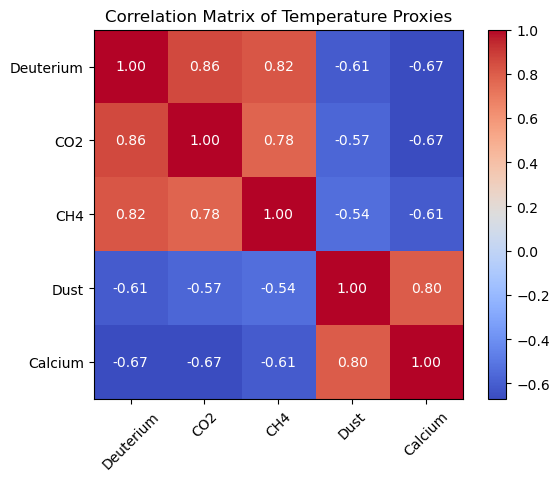

In [79]:
# plot correlation matrix for the original data
Cor = np.corrcoef(data)
plt.imshow(Cor)
plt.colorbar()
plt.set_cmap('coolwarm')
plt.title('Correlation Matrix of Temperature Proxies')

for i in range(5):
    for j in range(5):
        plt.text(j, i, f'{Cor[i, j]:.2f}', 
                 ha='center', va='center', color='white')
plt.xticks(range(5), ['Deuterium', 'CO2', 'CH4', 'Dust', 'Calcium'], rotation=45)
plt.yticks(range(5), ['Deuterium', 'CO2', 'CH4', 'Dust', 'Calcium'])

plt.show()

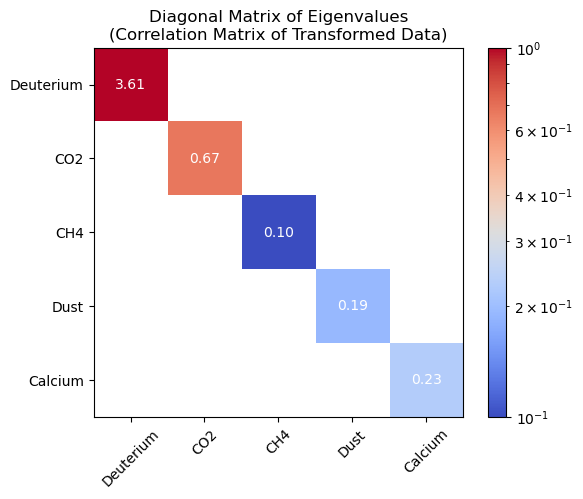

In [80]:
# plot the correlation matrix of the transformed data, which is the diagonal matrix of eigenvalues
from matplotlib.colors import LogNorm

plt.imshow(D, cmap='coolwarm', norm=LogNorm(vmin=1e-1, vmax=1))
plt.colorbar()
plt.title('Diagonal Matrix of Eigenvalues' + "\n"  + '(Correlation Matrix of Transformed Data)')

for i in range(5):
    for j in range(5):
        plt.text(j, i, f'{D[i, j]:.2f}', 
                 ha='center', va='center', color='white')
plt.xticks(range(5), ['Deuterium', 'CO2', 'CH4', 'Dust', 'Calcium'], rotation=45)
plt.yticks(range(5), ['Deuterium', 'CO2', 'CH4', 'Dust', 'Calcium'])

plt.show()

In [81]:
# make the first row of the approximated data matrix an array for plotting
deu_t = np.transpose(approx[0])
deu_approx = np.array(deu_t)

Text(0.5, 1.0, 'Original Deuterium Data From EDC Ice Core')

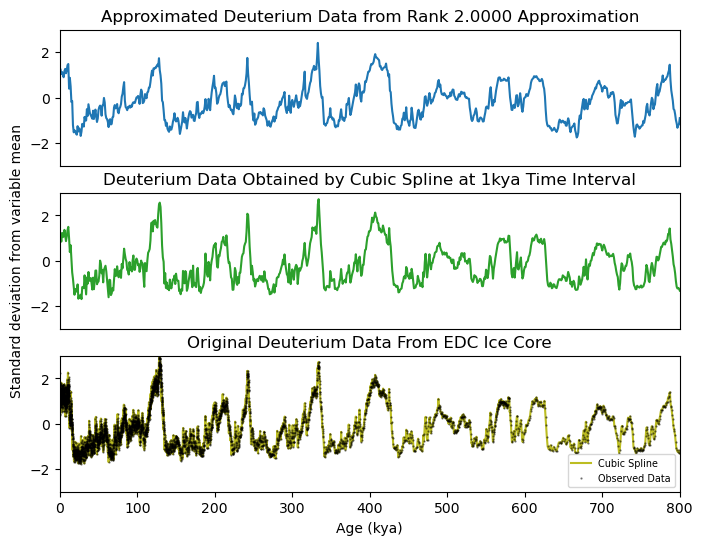

In [82]:
# plot deuterium

fig,ax = plt.subplots(nrows=3, ncols=1, figsize=(8,6))
ax[0].plot(time_1, deu_approx, 'tab:blue')
ax[0].axis([0,800,-3,3])
ax[0].set_title('Approximated Deuterium Data from Rank %0.4f Approximation' % k)
ax[0].set_xticks([])

ax[1].plot(time_1, deu_1, 'tab:green')
ax[1].axis([0,800,-3,3])
ax[1].set_xticks([])
ax[1].set_ylabel("Standard deviation from variable mean")
ax[1].set_title('Deuterium Data Obtained by Cubic Spline at 1kya Time Interval')

ax[2].plot(deu_age,cs_deuterium(deu_age),'tab:olive', label = 'Cubic Spline')
ax[2].plot(deu_age,deu_dobs, 'ko', markersize=0.6, alpha=0.5, label = 'Observed Data')
ax[2].axis([0,800,-3,3])
ax[2].set_xlabel('Age (kya)')
ax[2].legend(fontsize='x-small')
ax[2].set_title('Original Deuterium Data From EDC Ice Core')

In [83]:
# make the second row of the approximated data matrix an array for plotting
co2_t = np.transpose(approx[1])
co2_approx = np.array(co2_t)

Text(0.5, 1.0, 'Original CO2 Data From EDC Ice Core')

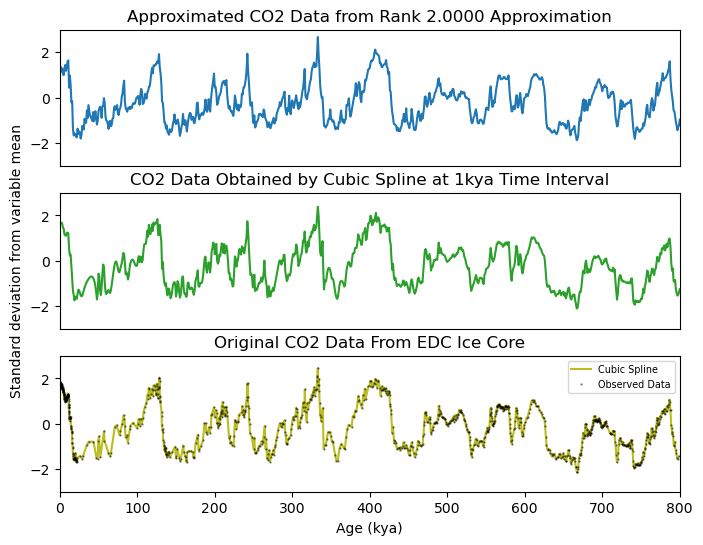

In [84]:
# plot CO2

fig,ax = plt.subplots(nrows=3, ncols=1, figsize=(8,6))
ax[0].plot(time_1, co2_approx, 'tab:blue')
ax[0].axis([0,800,-3,3])
ax[0].set_title('Approximated CO2 Data from Rank %0.4f Approximation' % k)
ax[0].set_xticks([])

ax[1].plot(time_1, co2_1, 'tab:green')
ax[1].axis([0,800,-3,3])
ax[1].set_xticks([])
ax[1].set_ylabel("Standard deviation from variable mean")
ax[1].set_title('CO2 Data Obtained by Cubic Spline at 1kya Time Interval')

ax[2].plot(co2_age,cs_co2(co2_age),'tab:olive', label = 'Cubic Spline')
ax[2].plot(co2_age,co2_dobs,'ko', markersize=0.6, alpha=0.5, label = 'Observed Data')
ax[2].axis([0,800,-3,3])
ax[2].set_xlabel('Age (kya)')
ax[2].legend(fontsize='x-small')
ax[2].set_title('Original CO2 Data From EDC Ice Core')

# 6. Works Cited